# 🧾 NHIỆM VỤ 2: THỐNG KÊ MÔ TẢ TẬP DỮ LIỆU RƯỢU ĐỎ

## Giới thiệu
Tập dữ liệu được lấy từ [Red Wine Quality Dataset](https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification), chứa thông tin về 12 đặc trưng hoá học của các mẫu rượu vang đỏ và nhãn chất lượng của chúng (từ 0–10 điểm).

Mục tiêu của phần này là:
- Thực hiện thống kê mô tả các biến.
- Tìm hiểu mối quan hệ giữa các đặc trưng và **chất lượng rượu (`quality`)**.
- Chuẩn bị dữ liệu cho bước phân loại sau.

---

## Mục lục
1. Nạp dữ liệu
2. Khám phá thông tin tổng quát
3. Thống kê mô tả
4. Kiểm tra giá trị thiếu và trùng lặp
5. Trực quan hóa phân bố dữ liệu
6. Kết luận

---


## 1.Nạp dữ liệu

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv("winequality-red.csv")

# Hiển thị 5 dòng đầu
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2.Thông tin tổng quát về dữ liệu


In [ ]:
# Kiểm tra kích thước và kiểu dữ liệu
print("Kích thước dữ liệu:", wine.shape)
wine.info()


Kích thước dữ liệu: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Nhận xét:**
- Dữ liệu có 1599 dòng và 12 cột đặc trưng + 1 cột nhãn `quality`.
- Tất cả các cột đều ở dạng số (`float64` hoặc `int64`), rất thuận tiện cho việc thống kê và huấn luyện mô hình.


## 3.Thống kê mô tả


In [ ]:
# Thống kê mô tả cơ bản
wine.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Nhận xét:**
- Một số cột như `residual sugar` và `alcohol` có độ lệch chuẩn lớn - dữ liệu phân tán mạnh.
- Cột `quality` dao động trong khoảng **3 đến 8**, giá trị trung bình khoảng **5.6**, nghĩa là phần lớn rượu có chất lượng trung bình.


🍷 Kết Luận Thống Kê Mô Tả Chất Lượng Rượu Đỏ (Summary) 📊

Kết quả thống kê mô tả cho thấy sự đa dạng rõ rệt giữa các thành phần hóa học của rượu vang đỏ, với chất lượng tập trung ở mức trung bình và sự biến động lớn ở các chất bảo quản.

1. Các Yếu Tố Chính Về Chất Lượng và Cấu Trúc

| Thuộc tính | Trung bình (mean) | std | Nhận xét |
| :--- | :---: | :---: | :--- |
| **Quality (Chất lượng)** | $5.64$ | $0.81$ | **Tập trung ở mức trung bình.** Hầu hết các mẫu rượu đều đạt điểm $5$ hoặc $6$. |
| **Alcohol (Nồng độ cồn)** | $10.42$ | $1.07$ | **Khá ổn định.** Nồng độ cồn ít biến động, cho thấy sự đồng đều về độ mạnh. |
| **pH** | $3.31$ | $0.15$ | **Rất ổn định.** Độ axit tổng thể rất đồng đều giữa các mẫu. |
| **Density (Mật độ)** | $0.9967$ | $0.0019$ | **Cực kỳ ổn định.** Là thuộc tính ít biến động nhất, mật độ gần như đồng nhất. |

---

2. Các Yếu Tố Biến Động Cao (Phân Tán Rộng)

Sự khác biệt lớn nhất giữa các mẫu nằm ở các chất bảo quản và vị ngọt:

| Thuộc tính | std | Nhận xét về Biến động |
| :--- | :---: | :--- |
| **Total Sulfur Dioxide** | **32.90** | **Biến động cực lớn.** Cho thấy sự khác biệt đáng kể trong việc xử lý và hàm lượng chất bảo quản. |
| **Residual Sugar** | $1.41$ | **Biến động cao.** Ảnh hưởng lớn đến vị ngọt của rượu. |
| **Free Sulfur Dioxide** | $10.46$ | **Biến động cao.** Tương tự như tổng SO2, chỉ ra sự đa dạng trong quy trình sản xuất. |

---

 Tóm Lược

Tập dữ liệu này có đặc điểm là **chất lượng tập trung ở mức trung bình** và **sự ổn định cao** về các thuộc tính cấu trúc cơ bản như **pH** và **density**. Sự **biến động chính** nằm ở **sulfur dioxide** và **residual sugar**, gợi ý rằng đây là những yếu tố then chốt cần được phân tích để xác

## 4.Kiểm tra dữ liệu thiếu và trùng lặp


In [ ]:
# Kiểm tra missing values
print("Số giá trị thiếu mỗi cột:")
print(wine.isnull().sum())

# Kiểm tra trùng lặp
duplicates = wine.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicates}")


Số giá trị thiếu mỗi cột:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Số dòng trùng lặp: 240


**Nhận xét:**
- Bộ dữ liệu không có giá trị thiếu.
- Có một vài dòng trùng lặp → có thể loại bỏ nếu cần trước khi huấn luyện mô hình.


## 5.Trực quan hóa dữ liệu



### 5.1.Phân bố chất lượng rượu

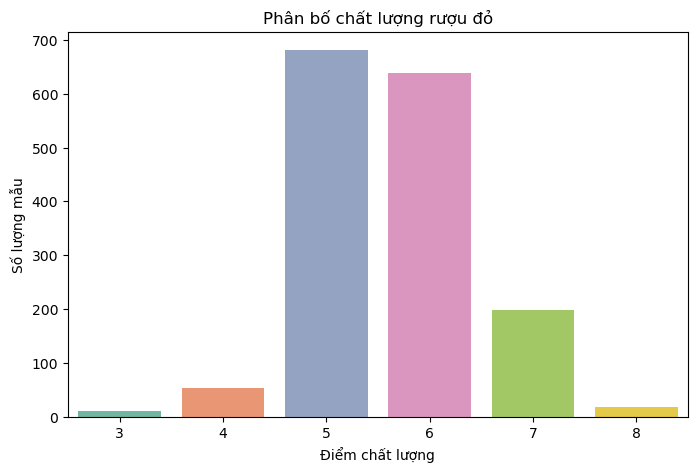

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.countplot(x='quality', data=wine, hue='quality', palette='Set2', legend=False)

plt.title('Phân bố chất lượng rượu đỏ')
plt.xlabel('Điểm chất lượng')
plt.ylabel('Số lượng mẫu')
plt.show()

**Nhận xét:**
- Phần lớn rượu có điểm **5–6**, số mẫu có điểm cao (7–8) ít hơn nhiều.
- Đây là tập dữ liệu **mất cân bằng nhẹ**.

---


### 5.2. Mối quan hệ giữa nồng độ cồn và chất lượng


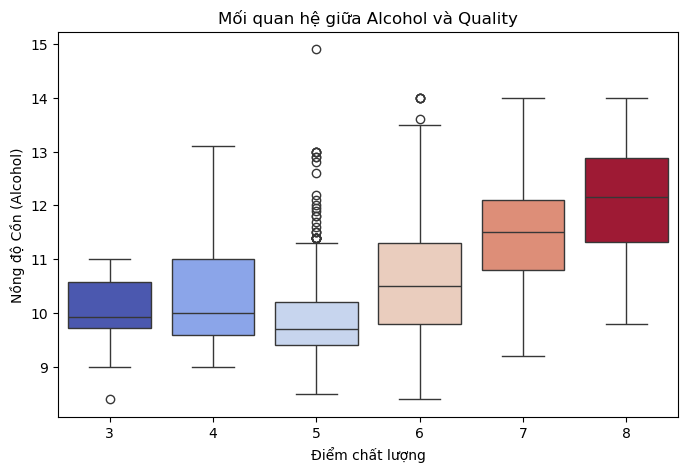

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.boxplot(x='quality', y='alcohol', data=wine, hue='quality', palette='coolwarm', legend=False)

plt.title('Mối quan hệ giữa Alcohol và Quality')
plt.xlabel('Điểm chất lượng') # Thêm nhãn trục X cho rõ ràng
plt.ylabel('Nồng độ Cồn (Alcohol)') # Thêm nhãn trục Y cho rõ ràng
plt.show()

**Nhận xét:**
- Rượu có **nồng độ cồn cao thường được đánh giá chất lượng tốt hơn.**
- Có xu hướng tăng dần rõ ràng từ `quality = 3` đến `quality = 8`.

---


### 5.3. Ma trận tương quan giữa các đặc trưng


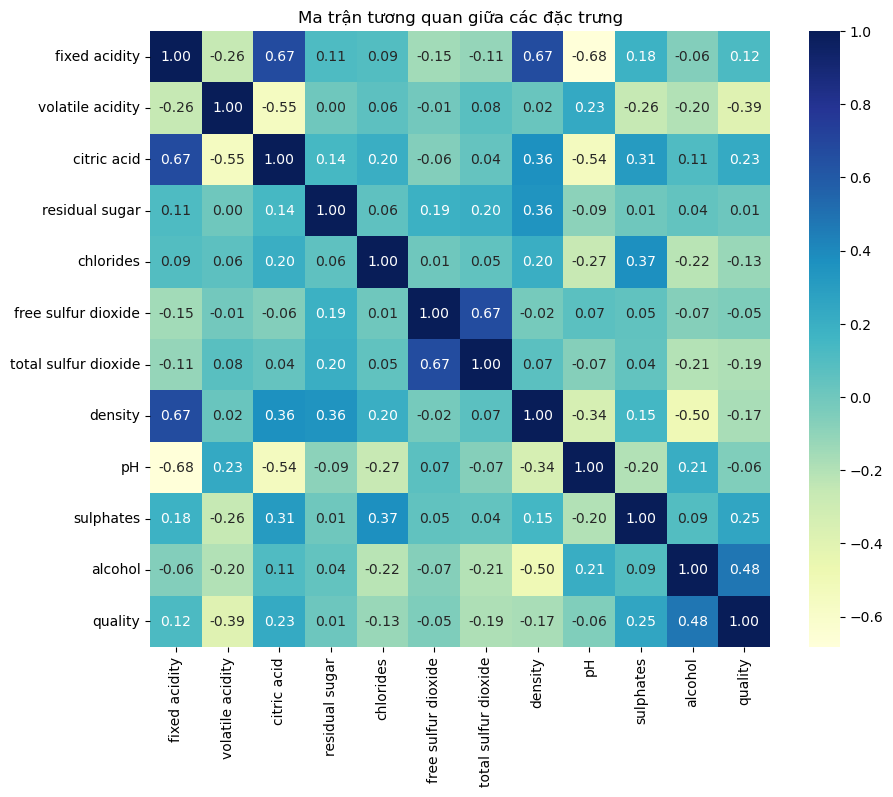

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()


**Nhận xét:**
- `alcohol` và `volatile acidity` có tương quan mạnh với `quality`.
- `density`, `citric acid`, `sulphates` cũng ảnh hưởng nhất định đến chất lượng rượu.


##6.Kết luận

- Bộ dữ liệu **Red Wine Quality** gồm 1599 mẫu, 12 đặc trưng và 1 nhãn chất lượng.  
- Không có dữ liệu thiếu, chỉ có vài dòng trùng lặp.  
- Các đặc trưng liên quan chặt chẽ đến chất lượng gồm:  
- `alcohol` (cồn) — **tác động tích cực**  
- `volatile acidity` (độ axit dễ bay hơi) — **tác động tiêu cực**  
- `sulphates`, `citric acid` — có ảnh hưởng nhẹ  

=> Dữ liệu đã sẵn sàng cho bước **tiền xử lý và huấn luyện mô hình phân loại** ở nhiệm vụ tiếp theo.
